In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import torch

In [2]:
Model=model=tf.keras.models.load_model('Model10_sg')
EmbeddingSize=10

In [3]:
Data=torch.load('ws353_mfcc_features_154.pt')

In [4]:
words353_filename = 'wordsim353_agreed.txt'
cname = ['desc','word1','word2','extra']
df = pd.read_csv(words353_filename, skiprows=11, sep='\t', names = cname )
 
column_values = df[["word1", "word2"]].values.ravel()
words_req =  pd.unique(column_values)

In [7]:
len(words_req)

437

In [8]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 20)                1920      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 154, 20)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 154, 10)           1240      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 13)          143       
Total params: 3,303
Trainable params: 3,303
Non-trainable params: 0
_________________________________________________________________


In [9]:
modelEnc = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
modelEnc.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_input (InputLa [(None, 154, 13)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                1920      
Total params: 1,920
Trainable params: 1,920
Non-trainable params: 0
_________________________________________________________________


In [10]:
Data.keys()

dict_keys(['LOVE', 'SEX', 'TIGER', 'CAT', 'BOOK', 'PAPER', 'COMPUTER', 'KEYBOARD', 'INTERNET', 'PLANE', 'CAR', 'TRAIN', 'TELEPHONE', 'COMMUNICATION', 'TELEVISION', 'RADIO', 'MEDIA', 'DRUG', 'ABUSE', 'BREAD', 'BUTTER', 'CUCUMBER', 'POTATO', 'DOCTOR', 'NURSE', 'PROFESSOR', 'STUDENT', 'SMART', 'STUPID', 'COMPANY', 'STOCK', 'MARKET', 'PHONE', 'CD', 'JAGUAR', 'EGG', 'FERTILITY', 'LIVE', 'LIFE', 'LIBRARY', 'BANK', 'MONEY', 'WOOD', 'FOREST', 'CASH', 'KING', 'CABBAGE', 'QUEEN', 'ROOK', 'BISHOP', 'RABBI', 'JERUSALEM', 'ISRAEL', 'PALESTINIAN', 'HOLY', 'FUCK', 'MARADONA', 'FOOTBALL', 'SOCCER', 'BASKETBALL', 'TENNIS', 'RACKET', 'ARAFAT', 'PEACE', 'TERROR', 'JACKSON', 'LAW', 'LAWYER', 'MOVIE', 'STAR', 'POPCORN', 'CRITIC', 'THEATER', 'PHYSICS', 'PROTON', 'CHEMISTRY', 'SPACE', 'ALCOHOL', 'VODKA', 'GIN', 'BRANDY', 'DRINK', 'EAR', 'MOUTH', 'EAT', 'BABY', 'MOTHER', 'AUTOMOBILE', 'GEM', 'JEWEL', 'JOURNEY', 'VOYAGE', 'BOY', 'LAD', 'COAST', 'SHORE', 'ASYLUM', 'MADHOUSE', 'MAGICIAN', 'WIZARD', 'MIDDAY', 'NO

In [11]:
modelEnc.predict(Data['LOVE'][0].T[np.newaxis, :])[0]

array([-2.6640978e-01,  1.7756651e-01, -2.3813377e-01, -2.2548385e-01,
       -2.5630233e-01, -1.9829674e-01,  1.4137784e-01, -8.0935419e-02,
       -2.7842263e-02, -1.9228345e-01, -0.0000000e+00,  1.7361582e-20,
        0.0000000e+00, -0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
        1.0000000e+00,  0.0000000e+00,  3.3499360e-02,  1.3293395e-12],
      dtype=float32)

In [12]:
modelEnc.predict(Data['SEX'][0].T[np.newaxis, :])[0]

array([-2.6631609e-01,  1.7750867e-01, -2.3804304e-01, -2.2541383e-01,
       -2.5622076e-01, -1.9824117e-01,  1.4131270e-01, -8.0912836e-02,
       -2.7827920e-02, -1.9222318e-01, -4.5752106e-32,  2.9097209e-02,
        0.0000000e+00, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        7.6160169e-01,  0.0000000e+00,  3.3499360e-02,  7.6158410e-01],
      dtype=float32)

In [60]:
len(Data['LOSS'])

5

In [61]:
emb=[]
emb2=[]
mfcc=Data['LOVE'][0].T
mfcc2=Data['LOSS'][0].T

Embedding=modelEnc.predict(mfcc[np.newaxis, :])[0][0:EmbeddingSize]
Embedding2=modelEnc.predict(mfcc2[np.newaxis, :])[0][0:EmbeddingSize]
emb.append(Embedding)
emb2.append(Embedding2)

In [62]:
emb

[array([-0.26640978,  0.17756651, -0.23813377, -0.22548385, -0.25630233,
        -0.19829674,  0.14137784, -0.08093542, -0.02784226, -0.19228345],
       dtype=float32)]

In [63]:
emb2

[array([-0.2664243 ,  0.17757733, -0.23814571, -0.22549476, -0.25631678,
        -0.19831283,  0.14138673, -0.08094025, -0.02784467, -0.19229342],
       dtype=float32)]

In [64]:

for i in range(len(Data['LOVE'])):
    mfcc=Data['LOVE'][i].T
    # print(modelEnc.predict(mfcc[np.newaxis, :])[0][EmbeddingSize:-1])
    Embedding=(modelEnc.predict(mfcc[np.newaxis, :])[0][0:EmbeddingSize])
    emb.append(Embedding)

for i in range(len(Data['LOSS'])):
    mfcc2=Data['LOSS'][i].T
    # print(modelEnc.predict(mfcc[np.newaxis, :])[0][EmbeddingSize:-1])
    Embedding2=(modelEnc.predict(mfcc2[np.newaxis, :])[0][0:EmbeddingSize])
    emb2.append(Embedding2)
        


In [66]:
len(emb2)

6

In [89]:
def embeddingPlotTSNE(X):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xlim(-300,300)
    plt.ylim(-300,200)
    X_embedded = TSNE(n_components=2).fit_transform(X)
    X_embedded.shape
    for word in range(len(X)):
        x, y = X_embedded[word][0],X_embedded[word][1]
        plt.scatter(x, y, marker='x', color='red')
        # plt.text(x+10, y+1, words[word], fontsize=9)
        plt.title('t-SNE projection for embedings for differenct utterances of same word')
    # plt.show()
def embeddingPlotTSNEgreen(X):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xlim(-300,300)
    plt.ylim(-300,200)
    X_embedded = TSNE(n_components=2).fit_transform(X)
    X_embedded.shape
    for word in range(len(X)):
        x, y = X_embedded[word][0],X_embedded[word][1]
        plt.scatter(x, y, marker='x', color='green')
        # plt.text(x+10, y+1, words[word], fontsize=9)
        plt.title('t-SNE projection for embedings for differenct utterances of same word')
    # plt.show()

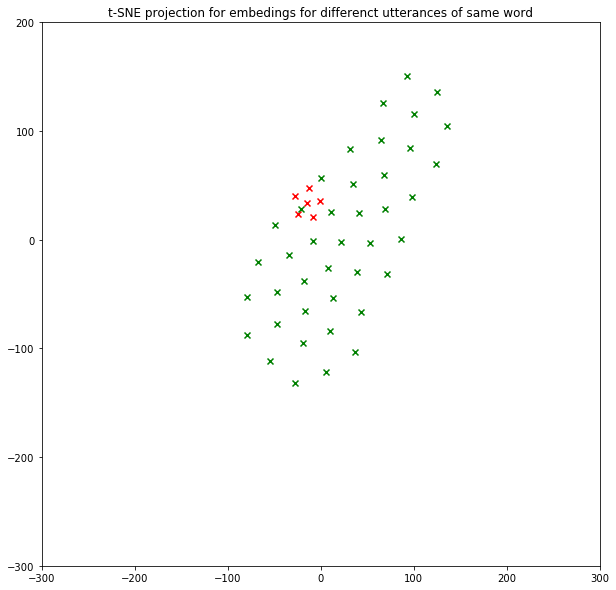

In [98]:
embeddingPlotTSNE(emb2)
embeddingPlotTSNEgreen(emb)

In [56]:
Emb={}
for word in Data:
    # print(word)
    Embedding=np.zeros(EmbeddingSize)
    # print('total mfcc:',len(Data[word]))
    if(len(Data[word])!=0):
        for i in range(len(Data[word])):
            mfcc=Data[word][i].T
            # print(modelEnc.predict(mfcc[np.newaxis, :])[0][EmbeddingSize:-1])
            Embedding+=modelEnc.predict(mfcc[np.newaxis, :])[0][0:EmbeddingSize]
        Embedding=Embedding/len(Data[word])
    Emb[word]=Embedding


KeyboardInterrupt: 

In [27]:
Emb['LOVE']

array([-0.26573128,  0.17706875, -0.2375665 , -0.22497453, -0.25563189,
       -0.19757525,  0.14095581, -0.08071609, -0.02773052, -0.19181929])

In [28]:
Emb['SEX']

array([-0.2661432 ,  0.17737589, -0.23790528, -0.22528393, -0.25604399,
       -0.19803329,  0.14120875, -0.08085269, -0.02779886, -0.19210292])

In [29]:
np.save('Emb_SG10',Emb)

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


In [5]:
Emb['SEEPAGE']

NameError: name 'Emb' is not defined

In [6]:
df

NameError: name 'df' is not defined

In [9]:
words353_filename = "wordsim353_agreed.txt"
cname = ['desc','word1','word2','rating']
df = pd.read_csv(words353_filename, skiprows=11, sep='\t', names = cname)
df = df[['word1','word2','rating']]
data = np.load('Emb_CB10.npy', allow_pickle=True).item()

for k,v in data.items():
    data.update({k.upper(): v})


sim = []
for index, row in df.iterrows():
    w1 = row['word1'].upper()
    # print(w1)
    w2 = row['word2'].upper()
    # print(w2)
    sim.append(cosine_similarity(data[w1].reshape(1,-1), data[w2].reshape(1,-1)))
    # print(cosine_similarity(data[w1].reshape(1,-1), data[w2].reshape(1,-1)))


sim = np.array(sim).squeeze()
df['emb'] = sim

df.corr(method ='pearson')


,rating,emb
rating,1.000000,-0.106962
emb,-0.106962,1.000000


In [10]:
sim.shape

(352,)

In [11]:
df['rating'].values

array([ 6.77,  7.35, 10.  ,  7.46,  7.62,  7.58,  5.77,  6.31,  7.5 ,
        6.77,  7.42,  6.85,  6.19,  5.92,  7.  ,  6.62,  6.81,  4.62,
        5.81,  7.08,  8.08,  1.62,  1.31,  0.92,  1.81,  6.69,  3.73,
        0.92,  7.46,  8.12,  7.73,  9.15,  0.31,  0.23,  8.58,  5.92,
        6.69,  8.46,  7.65,  1.62,  9.44,  8.62,  9.03,  6.81,  6.63,
        7.56,  6.73,  7.65,  2.5 ,  8.38,  7.38,  6.19,  6.73,  7.92,
        8.12,  7.35,  4.88,  5.54,  8.46,  8.13,  3.04,  1.31,  5.96,
        6.87,  7.85,  2.65,  8.94,  8.96,  9.29,  8.83,  9.1 ,  8.87,
        9.02,  9.29,  8.79,  7.52,  7.1 ,  7.38,  6.46,  6.27,  2.69,
        4.46,  5.85,  5.  ,  2.08,  4.42,  4.38,  1.85,  3.08,  0.92,
        3.15,  0.92,  0.54,  2.08,  0.54,  0.62,  8.42,  9.04,  8.27,
        7.57,  7.29,  8.5 ,  7.73,  6.88,  5.65,  3.31,  8.  ,  8.  ,
        7.08,  6.85,  7.  ,  4.77,  5.62,  5.87,  8.08,  7.  ,  6.85,
        7.42,  6.58,  6.42,  8.21,  7.69,  7.23,  6.71,  5.58,  7.48,
        8.45,  8.06,

In [12]:
from scipy import stats
from sklearn.preprocessing import normalize

In [13]:
from scipy import statsnormalize(df['emb'].values)

SyntaxError: invalid syntax (<ipython-input-13-bf429a0ecb99>, line 1)

In [14]:
from scipy import stats
stats.spearmanr(df['emb'].values, df['rating'].values)

SpearmanrResult(correlation=-0.07932180913115523, pvalue=0.13747583388493786)

In [65]:
stats.spearmanr([0,2,1], [0,2,1])

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
